# WeatherPy
----

### Analysis
* As expected, weather becomes warmer closer to the equator (0 Deg. Latitude). More interestingly, the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This is most likely due to the tilt of the earth and opposing seasonality trends by hemisphere.
* There is a weak relationship between latitude and cloudiness. However, there are strong bands of cities at 0, 20, 40, 75, and 90% cloudiness.
* There is a weak relationship between latitude and wind speed. However, the farther from the equator, the more likely a city is to have wind speeds over 20 mph.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [47]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
#Create a df to add all the data from the API calls.
cities_df = pd.DataFrame({'City':cities})
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval


C:\Users\abracho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\abracho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\abracho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\abracho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\abracho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value 

------------------------
Proceesing: City #  1  |  Kapaa US
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=kapaa
City not found, skipping...
------------------------
Proceesing: City #  2  |  Kruisfontein ZA
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=kruisfontein
------------------------
Proceesing: City #  3  |  Bluff AU
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=bluff
------------------------
Proceesing: City #  4  |  Mar del Plata AR
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=mar+del+plata
------------------------
Proceesing: City #  5  |  Mataura NZ
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=mataura
------------------------
Proceesing: City #  6  |  Taoudenni ML
http://api.openweathermap.org

------------------------
Proceesing: City #  47  |  Tasiilaq GL
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=tasiilaq
------------------------
Proceesing: City #  48  |  Sao Felix do Xingu BR
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=sao+felix+do+xingu
------------------------
Proceesing: City #  49  |  Awbari LY
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=awbari
------------------------
Proceesing: City #  50  |  Uray RU
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=uray
------------------------
Proceesing: City #  51  |  Harrisonville US
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=harrisonville
------------------------
Proceesing: City #  52  |  Darhan MN
http://api.openweathermap.org/data/2.5/w

------------------------
Proceesing: City #  93  |  Alepe CI
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=alepe
City not found, skipping...
------------------------
Proceesing: City #  94  |  Narsaq GL
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=narsaq
------------------------
Proceesing: City #  95  |  Provideniya RU
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=provideniya
------------------------
Proceesing: City #  96  |  Myitkyina MM
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=myitkyina
------------------------
Proceesing: City #  97  |  Gueret FR
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=gueret
------------------------
Proceesing: City #  98  |  Vestmannaeyjar IS
http://api.openweathermap.or

------------------------
Proceesing: City #  138  |  Geraldton CA
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=geraldton
------------------------
Proceesing: City #  139  |  Yuzhno-Kurilsk RU
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=yuzhno-kurilsk
------------------------
Proceesing: City #  140  |  Hilo US
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=hilo
City not found, skipping...
------------------------
Proceesing: City #  141  |  Tateyama JP
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=tateyama
------------------------
Proceesing: City #  142  |  San Patricio PY
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=san+patricio
------------------------
Proceesing: City #  143  |  Pangnirtung CA
http:

------------------------
Proceesing: City #  185  |  Paka HR
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=paka
------------------------
Proceesing: City #  186  |  Santa Maria BR
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=santa+maria
------------------------
Proceesing: City #  187  |  Nioro GM
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=nioro
------------------------
Proceesing: City #  188  |  Camopi GF
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=camopi
------------------------
Proceesing: City #  189  |  Llanes ES
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=llanes
------------------------
Proceesing: City #  190  |  Iwanai JP
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd

------------------------
Proceesing: City #  232  |  Sola NO
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=sola
------------------------
Proceesing: City #  233  |  Morlaix FR
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=morlaix
------------------------
Proceesing: City #  234  |  Sao Miguel do Guama BR
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=sao+miguel+do+guama
------------------------
Proceesing: City #  235  |  Lagoa PT
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=lagoa
City not found, skipping...
------------------------
Proceesing: City #  236  |  Saint Anthony US
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=saint+anthony
City not found, skipping...
------------------------
Proceesing: City #

------------------------
Proceesing: City #  278  |  Yumen CN
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=yumen
------------------------
Proceesing: City #  279  |  Anshun CN
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=anshun
------------------------
Proceesing: City #  280  |  Karratha AU
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=karratha
------------------------
Proceesing: City #  281  |  Zhigansk RU
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=zhigansk
------------------------
Proceesing: City #  282  |  Yarovoye RU
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=yarovoye
------------------------
Proceesing: City #  283  |  Nelson Bay AU
http://api.openweathermap.org/data/2.5/weather?appid=25832

City not found, skipping...
------------------------
Proceesing: City #  324  |  Padang ID
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=padang
------------------------
Proceesing: City #  325  |  Comodoro Rivadavia AR
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=comodoro+rivadavia
------------------------
Proceesing: City #  326  |  Minas Novas BR
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=minas+novas
------------------------
Proceesing: City #  327  |  Hambantota LK
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=hambantota
------------------------
Proceesing: City #  328  |  Calatayud ES
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=calatayud
------------------------
Proceesing: City #  329  |  Reykja

------------------------
Proceesing: City #  370  |  Arkadelphia US
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=arkadelphia
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  371  |  Shumyachi RU
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=shumyachi
------------------------
Proceesing: City #  372  |  Pisco PE
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=pisco
------------------------
Proceesing: City #  373  |  Port-Cartier CA
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=port-cartier
------------------------
Proceesing: City #  374  |  Bandarbeyla SO
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=bandarbeyla
------------------------
Proceesing: City #

------------------------
Proceesing: City #  416  |  Umea SE
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=umea
------------------------
Proceesing: City #  417  |  Arlit NE
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=arlit
------------------------
Proceesing: City #  418  |  Tonantins BR
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=tonantins
------------------------
Proceesing: City #  419  |  Najran SA
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=najran
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  420  |  Hastings NZ
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=hastings
------------------------
Proceesing: City #  421  |  Pedernales EC
http://a

------------------------
Proceesing: City #  462  |  Mbandaka CD
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=mbandaka
------------------------
Proceesing: City #  463  |  Urengoy RU
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=urengoy
------------------------
Proceesing: City #  464  |  Paamiut GL
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=paamiut
------------------------
Proceesing: City #  465  |  Ullapool GB
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=ullapool
------------------------
Proceesing: City #  466  |  Hualmay PE
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=hualmay
------------------------
Proceesing: City #  467  |  Margate AU
http://api.openweathermap.org/data/2.5/weather?appid=2583

------------------------
Proceesing: City #  508  |  Nhulunbuy AU
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=nhulunbuy
------------------------
Proceesing: City #  509  |  Tessalit ML
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=tessalit
------------------------
Proceesing: City #  510  |  Port Blair IN
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=port+blair
------------------------
Proceesing: City #  511  |  Itoman JP
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=itoman
------------------------
Proceesing: City #  512  |  Takoradi GH
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=takoradi
------------------------
Proceesing: City #  513  |  Braga PT
http://api.openweathermap.org/data/2.5/weather?appi

City not found, skipping...
------------------------
Proceesing: City #  554  |  Ikalamavony MG
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=ikalamavony
------------------------
Proceesing: City #  555  |  Bunia CD
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=bunia
------------------------
Proceesing: City #  556  |  Worthing GB
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=worthing
------------------------
Proceesing: City #  557  |  Mercedes UY
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=mercedes
------------------------
Proceesing: City #  558  |  Hearst CA
http://api.openweathermap.org/data/2.5/weather?appid=25832662e6b98fd3d91111868cd6cb34&units=IMPERIAL&q=hearst
------------------------
Proceesing: City #  559  |  Biskamzha RU
http://api.openweathermap

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
clean_cities_df.count()

City                570
Country             570
Temperature (F)     570
Latitude            570
Longitude           570
Humidity (%)        570
Cloudiness (%)      570
Wind Speed (mph)    570
dtype: int64

In [58]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(25)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Kapaa,US,68.02,22.08,-159.32,78,90,21.92
1,Kruisfontein,ZA,68.38,-34,24.73,81,20,15.26
2,Bluff,AU,73.15,-23.58,149.07,93,88,5.41
3,Mar del Plata,AR,71.4,-46.43,-67.52,36,24,25.32
4,Mataura,NZ,68,-46.19,168.86,50,36,8.01
5,Taoudenni,ML,58.75,22.68,-3.98,20,0,1.05
6,Albany,US,19.45,42.65,-73.75,48,75,20.8
7,Ekibastuz,KZ,19.87,51.72,75.32,82,8,11.56
8,Saskylakh,RU,-0.52,71.97,114.09,75,64,13.13
9,Ilulissat,GL,14,69.22,-51.1,47,20,2.95


In [62]:
# Save data to a CSV file
clean_cities_df.to_csv("cities.CSV")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

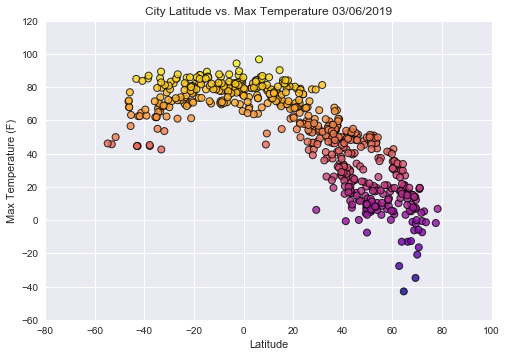

In [67]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

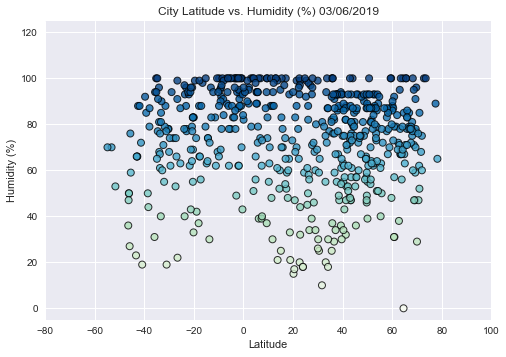

In [68]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {time.strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

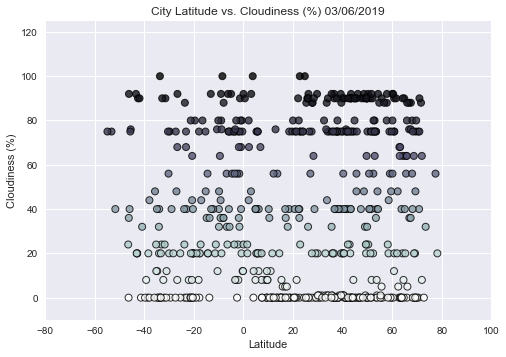

In [69]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {time.strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

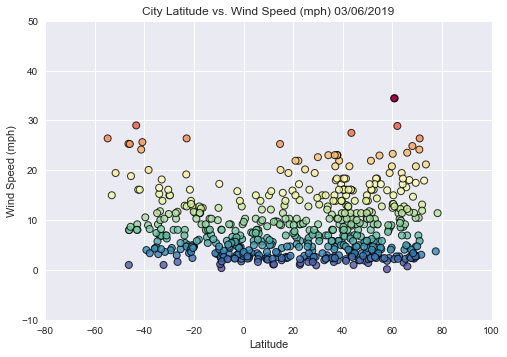

In [70]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {time.strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("Latitude_WindSpeed.png")

# Show plot
plt.show()

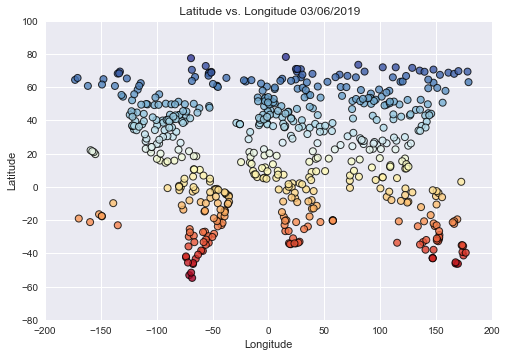

In [72]:
#Bonus step to visualize where the cities are on a scatterplot
#Spoiler alert: it's a map!

plt.scatter(clean_cities_df["Longitude"], 
            clean_cities_df["Latitude"], c=clean_cities_df["Latitude"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='RdYlBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f" Latitude vs. Longitude {time.strftime('%m/%d/%Y')}")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)
plt.xlim([-200, 200])
plt.ylim([-80, 100])

# Save the figure
plt.savefig("Latitude_Longitude.png")

# Show plot
plt.show()